# Lab 7: Event Selection Optimization

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
file1 = open ("../higgs_100000_pt_1000_1200.pkl",'rb')
higgs_data = pickle.load(file1)

# background dataset
file2 = open ("../qcd_100000_pt_1000_1200.pkl",'rb')
qcd_data = pickle.load(file2)

In each pT sample we have, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higg and QCD samples in each pT sample to give expected yields accordingly. 

### 1) Make a stacked histogram plot for the feature variable: mass

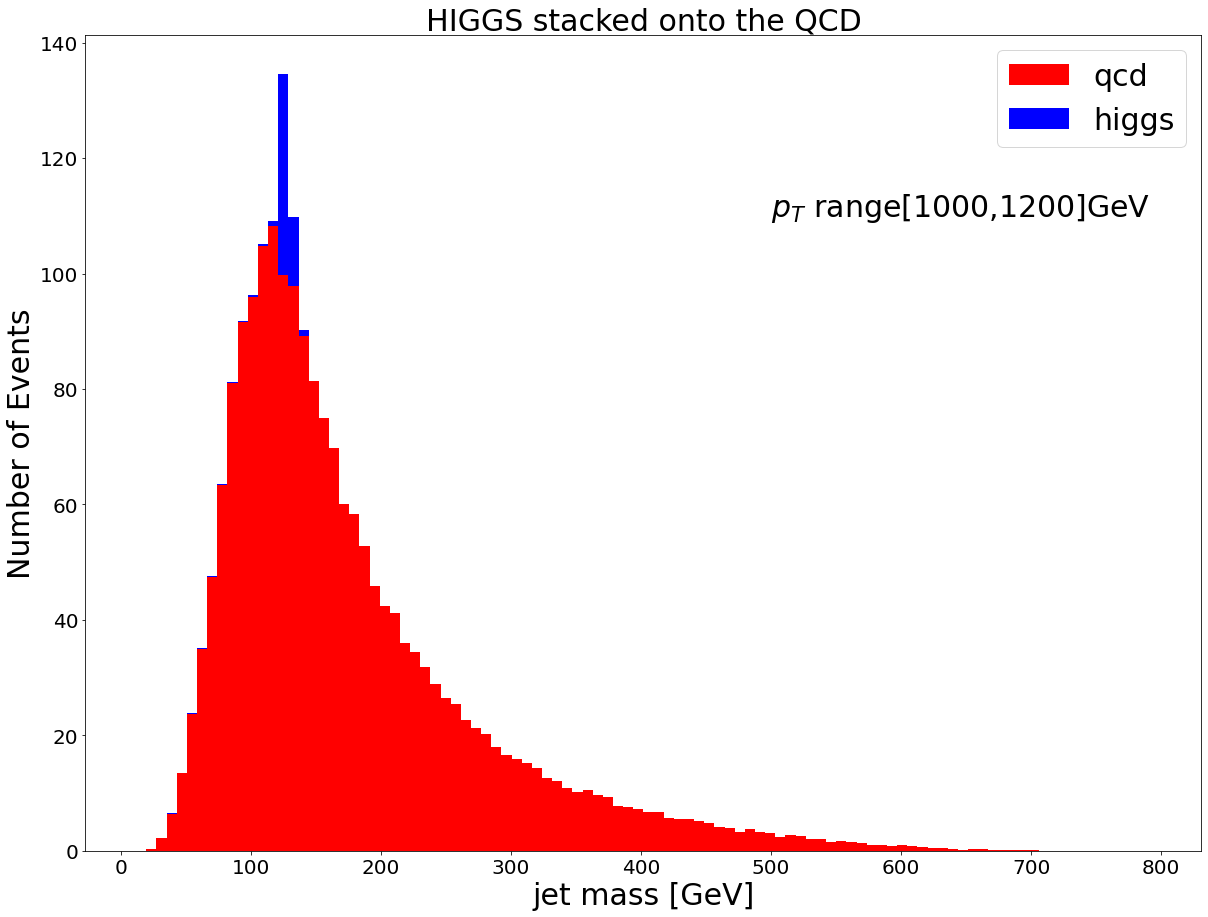

In [137]:
both_mass = [qcd_data['mass'], higgs_data['mass']]
colors = ['red','blue']
weight_higgs = np.array([50/100000]*len(higgs_data))
weight_qcd = np.array([2000/100000]*len(qcd_data))
weights = [weight_qcd,weight_higgs]
plt.hist(both_mass,stacked=True,weights=weights,color=colors,bins=100,label=['qcd', 'higgs'])


plt.tick_params(axis='both', labelsize=20)
plt.xlabel('jet mass [GeV]',size=30)
plt.ylabel('Number of Events',size=30)
plt.legend(loc="upper right",fontsize=30)
plt.text(500,110,'$p_{T}$ range[1000,1200]GeV',size=30)
plt.title('HIGGS stacked onto the QCD',size=30)
plt.show()

Now we'll use Poisson statistics for significant calculation

In [149]:
N_higgs = 50; N_qcd = 2000; N_both = N_higgs+N_qcd
exact_significance=stats.norm.ppf(stats.poisson.cdf(N_both,N_qcd))
print('Exact Significance: '+ str(exact_significance))

approx = N_higgs/np.sqrt(N_qcd)
print('Approximated Significance: ' + str(approx))


Exact Significance: 1.1282230087754428
Approximated Significance: 1.118033988749895
